<a href="https://colab.research.google.com/github/ronit2603/ML-Projects/blob/master/Low_Code_%26_Auto_ML_with_PyCaret_Kickstarter_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Low-Code & Auto-ML with PyCaret - Kickstarter

Welcome to this hands-on workshop session where we will learn about leveraging the very popular low-code and auto-ml library PyCaret!

![](https://i.imgur.com/cWzC62x.png)


The focus of this notebook is more of a kickstarter notebook to get your feet wet and get familiar with PyCaret before we hop on to more complex things! 

# 1 - Objective


The objective of this notebook will be to tackle a classification problem using the power of PyCaret. We will be exploring the following features and capabilities of PyCaret along the way:

-  __Getting Data:__ Learn how to import default datasets from PyCaret repository

-  __Environment Setup:__ Learn how to setup an experiment in PyCaret and get started with classification tasks!

-  __Compare Models:__ Learn how to compare multiple machine learning models for the given classification task based on model evaluation metrics

-  __Create Model:__ Learn how to create specific classifical models, perform stratified cross validation and evaluate classification metrics

-  __Tune Model:__ Learn how to automatically tune the hyper-parameters of classification models

-  __Plot Model:__ Learn how to analyze model performance using various diagnostic plots

-  __Finalize Model:__ Learn how to finalize the best model at the end of the experiment

-  __Predict Model:__ Learn how to make predictions on new / unseen data 

-  __Save / Load Model:__ Learn how to save / load a model for future use

# 2 - Install PyCaret

The first step to get started is to install `pycaret`. 

Run the following two lines




In [2]:
!pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 
     |████████████████████████████████| 5.1 MB 46.3 MB/s 
     |████████████████████████████████| 308 kB 40.3 MB/s 
     |████████████████████████████████| 132 kB 52.2 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 76.6 MB 1.3 MB/s 
     |████████████████████████████████| 57 kB 4.6 MB/s 
     |████████████████████████████████| 305 kB 58.2 MB/s 
     |████████████████████████████████| 192.9 MB 73 kB/s 
     |████████████████████████████████| 62 kB 900 kB/s 
     |████████████████████████████████| 11.9 MB 31.4 MB/s 
     |████████████████████████████████| 377 kB 37.8 MB/s 
     |████████████████████████████████| 54.5 MB 126 kB/s 
     |████████████████████████████████| 92 kB 115 kB/s 
     |████████████████████████████████| 40 kB 5.8 MB/s 
     |████████████████████████████████| 1

In [3]:
!pip install -U jinja2 # https://github.com/pycaret/pycaret/issues/2591 to bypass import errors later on

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 5.0 MB/s 
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.15.0 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.1

## Restart the Kernel now and then proceed by running the following cells as usual

## 2.1 - Enable Interactive Visuals

If you are using Google Colab, please run the following to enable interactive visuals

In [1]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [81]:
!pip install pytest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
!pip uninstall lightgbm -y


Found existing installation: lightgbm 3.3.2
Uninstalling lightgbm-3.3.2:
  Successfully uninstalled lightgbm-3.3.2


In [87]:
pip install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"

/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py:232: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 5.2 MB/s 
Skipping wheel build for lightgbm, due to binaries being disabled for it.



    Running setup.py install for lightgbm ... done


In [90]:
import pandas as pd
from pycaret.classification import *
from pandas._config import config
#get_ipython().run_cell_magic('Self', 'cell', set_config.pycaret.classification_report.setup(use_gpu = "True"))

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# 3 - Binary Classification

The objective in this notebook will be to solve a predictive machine learning classification problem. To be more specific, it is going to be binary classification.

Binary classification is a supervised machine learning technique where the key objective is to predict a response variable given a set of independent variables (features). The response variable is categorical, having two discrete class labels, such as 1/0, Yes/No, Positive/Negative, Default/Not-Default and so on. 

A few real world use cases for classification are listed below:

- Fraud detection models to detect if a transaction is fraudulent or not fraudulent
- A "pass or fail" test method or quality control in factories, i.e. deciding if a specification has or has not been met – a go/no-go classification.
- Sentiment Analysis -> Positive or Negative

# 4 - PyCaret Classification Module

PyCaret's `classification` module (`pycaret.classification`) is a supervised machine learning module which is used for training, tuning, evaluating and deploying classification models. 

The PyCaret `classification` module can be used for Binary or Multi-class classification problems. It has over 18 algorithms and 14 plots to analyze the performance of models. Be it hyper-parameter tuning, ensembling or advanced techniques like stacking, PyCaret's classification module has it all.

Do check out [`pycaret.classification`'s documentation](https://pycaret.gitbook.io/docs/get-started/quickstart#classification)and [full-fledged APIs](https://pycaret.readthedocs.io/en/latest/api/classification.html) as needed!

# 5 - Getting the Data

We will be using a popular open-source dataset, called the "Adult" dataset also known as "Census Income" dataset.

Key Objective: Predict whether income exceeds $50K/yr based on census data

You can download the data from the original source [found here](https://archive.ics.uci.edu/ml/datasets/adult) 


and load it using `pandas` or you can use PyCaret's data respository to load the data using the `get_data()` function (This will require an internet connection).

The PyCaret version of the dataset is slightly more processed and is a subset.

## 5.1 - Data Retrieval

In [91]:
from pycaret.datasets import get_data
dataset = get_data('income')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [92]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income >50K     32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [93]:
dataset.shape

(32561, 14)

In [94]:
dataset.iloc[25:30]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
25,56,Local-gov,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,1
26,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,0
27,54,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
28,39,Private,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,0
29,49,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0


## 5.2 - Split Data into Train-Test Datasets

In order to demonstrate the `predict_model()` function on unseen data, a holdout sample of 15% records has been withheld from the original dataset to be used for predictions. 

This will be your true unseen test dataset to be used at the end once all training is complete as a simulation of live real data.

In [95]:
# create train - test datasets
data_train = dataset.sample(frac=0.85, random_state=42)
data_test = dataset.drop(data_train.index)

# reset row numbers \ indices
data_train.reset_index(inplace=True, drop=True)
data_test.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data_train.shape))
print('Unseen Data For Predictions: ' + str(data_test.shape))

Data for Modeling: (27677, 14)
Unseen Data For Predictions: (4884, 14)


## 5.3 - Understanding the Data

Let's try to understand our dataset now in terms of the given attributes.

We use a dataset modified dataset from UCI called [Adult Data Set
](https://archive.ics.uci.edu/ml/datasets/adult). 

This dataset contains census data and details about various aspects of people and their income.

There are 32561 samples and 14 features. 

Brief descriptions of each column are as follows:

- __age__: continuous; age of the person

- __workclass__: categorical; working class of the person;
Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- __education__: categorical; educational qualification of the person;
Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- __education-num__: discrete numeric; educational qualification of the person as a encoded value; 

- __marital-status__: categorical; marital status of the person; 
Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

- __occupation__: categorical; occupation of the person;
Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- __relationship__: categorical; relationship information;
Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- __race__: categorical; race information;
White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- __sex__: categorical; gender of the person; 
Female, Male.

- __capital-gain__: continuous; overall capital gain 

- __capital-loss__: continuous; overall capital loss

- __hours-per-week__: continuous; working hours per week

- __native-country__: categorical; native country of residence;
United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- **`income >50K`**: Whether the income of the person is more than $50K (1=yes, 0=no) Target Column

The original dataset and data dictionary can be [found here](https://archive.ics.uci.edu/ml/datasets/adult).

In [96]:
data_train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,27,Private,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,0
1,45,State-gov,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
2,29,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,1
3,30,Private,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,0
4,29,Self-emp-not-inc,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States,0


# 6 - PyCaret Environment Setup

The `setup()` function initializes the environment in `pycaret` and creates the transformation pipeline to prepare the data for modeling and deployment. 

`setup()` must be called before executing any other function in `pycaret`. 

It takes two mandatory parameters: a `pandas` dataframe and the name of the target column. 

All other parameters are optional and are used to customize the pre-processing pipeline.

***This is a heavily loaded function because you can use its arguments to do a lot of powerful pre-processing, feature engineering and feature selection steps!***

When `setup()` is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. 

The data types are usually inferred correctly but this is not always the case. 

To account for this, PyCaret displays a table containing the features and their inferred data types after `setup()` is executed. 

If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. 

Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. 

These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

If there are columns which have incorrect indentified data types, we can leverage the `numeric_features` and `categorical_features` parameters in `setup()`.

In [97]:
from pycaret.classification import *

In [98]:
experiment = setup(data=data_train, target='income >50K', session_id=42) 

,Description,Value
0,session_id,42
1,Target,income >50K
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(27677, 14)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. 

Most of the information is related to the pre-processing pipeline which is constructed when `setup()` is executed. 

We are not doing any extensive pre-processing to start with, however a few important things to note at this stage include:

- **session_id :**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the `session_id` is set as `123` for later reproducibility.

- **Target Type :**  Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

- **Label Encoded :**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this experiment no label encoding is required since the target variable is of type numeric.

- **Original Data :**  Displays the original shape of the dataset. In this experiment (27677, 14) means 27,677 samples and 14 features including the target column. 

- **Missing Values :**  When there are missing values in the original data this will show as True. For this experiment there are several missing values in the dataset. 

- **Numeric Features :**  The number of features inferred as numeric. In this dataset, 4 features are inferred as numeric. 

- **Categorical Features :**  The number of features inferred as categorical. In this dataset, 9 features are inferred as categorical.

- **Transformed Train Set :**  Displays the shape of the transformed training set. Notice that the original shape of (27677, 24) is transformed into (19373, 104) for the transformed train set and the number of features have increased to 104 due to categorical encoding 

- **Transformed Test Set :**  Displays the shape of the transformed test/hold-out set. There are 8304 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the `train_size` parameter in setup. Can also be used as a validation set if you make decisions of choosing the best model based on this subset.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. 

Most of the parameters in `setup()` are optional and used for customizing the pre-processing pipeline.



# 7 - Comparing all Models

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). 

This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

We use a standard 5-fold cross validation

In [99]:
best_model = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8691,0.9243,0.6320,0.7809,0.6985,0.6161,0.6218,7.744
lightgbm,Light Gradient Boosting Machine,0.8689,0.9236,0.6416,0.7739,0.7014,0.6184,0.6230,0.454
xgboost,Extreme Gradient Boosting,0.8677,0.9225,0.6397,0.7702,0.6988,0.6150,0.6194,6.086
gbc,Gradient Boosting Classifier,0.8623,0.9163,0.5726,0.7964,0.6661,0.5823,0.5949,2.906
ada,Ada Boost Classifier,0.8573,0.9077,0.6062,0.7516,0.6709,0.5812,0.5868,0.926
lr,Logistic Regression,0.8470,0.9011,0.5870,0.7231,0.6480,0.5515,0.5564,5.234
rf,Random Forest Classifier,0.8457,0.8869,0.6094,0.7075,0.6546,0.5560,0.5587,2.448
knn,K Neighbors Classifier,0.8393,0.8667,0.6109,0.6855,0.6459,0.5424,0.5440,5.056
lda,Linear Discriminant Analysis,0.8377,0.8891,0.5539,0.7063,0.6208,0.5195,0.5257,0.446
ridge,Ridge Classifier,0.8368,0.0000,0.4969,0.7378,0.5937,0.4965,0.5117,0.060


Just one line of code has trained and evaluated around 14 models using cross validation. 

The score grid printed above by default is sorted using 'Accuracy' (highest to lowest) which can be changed by passing the `sort` parameter. 

For example `compare_models(sort = 'Recall')` will sort the grid by Recall instead of Accuracy. 

If you want to change the fold parameter from the default value of `10` to a different value then you can use the `fold` parameter. For example `compare_models(fold = 5)` will compare all models on 5 fold cross validation as we did above. 

Reducing the number of folds will improve the training time. By default, `compare_models` return the best performing model based on default sort order but can be used to return a list of top N models by using `n_select` parameter.

In [100]:
best_model

Looks like boosting models have taken up the leaderboard above!

# 8 - Create ML Models

`create_model` is one of the most important functions in PyCaret and is often the starting point or foundation behind most of the PyCaret functionalities. 

As the name suggests this function trains and evaluates a model using cross validation that can be set with `fold` parameter. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa and MCC by fold. 

For the remaining part of this tutorial, we will work with the following two models as our candidate models. 

The selections are for illustration purposes only where we pick the best model which is a boosting model and a simple logistic model just to compare:

```
- Light Gradient Boosting Machine ('lightgbm')
- Logistic Regression ('lr')
```

There are 18 classifiers available in the model library of PyCaret. To see list of all classifiers either check the `docstring` or use `models` function to see the library.

In [101]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## 8.1 - Create Light Gradient Boosting Model

In [102]:
lgbm = create_model('lightgbm', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8663,0.9205,0.6344,0.7682,0.6949,0.6103,0.6149
1,0.8712,0.9289,0.6462,0.7795,0.7066,0.6251,0.6296
2,0.8650,0.9236,0.6516,0.7528,0.6986,0.6122,0.6148
3,0.8699,0.9209,0.6226,0.7910,0.6968,0.6154,0.6226
4,0.8722,0.9240,0.6534,0.7782,0.7104,0.6292,0.6331
Mean,0.8689,0.9236,0.6416,0.7739,0.7014,0.6184,0.6230
Std,0.0028,0.0030,0.0116,0.0128,0.0060,0.0074,0.0075


In [103]:
lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## 8.2 - Create Logistic Regression Model

In [104]:
lr = create_model('lr', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8418,0.8955,0.5817,0.7072,0.6383,0.5383,0.5425
1,0.8514,0.9060,0.5957,0.7347,0.6580,0.5643,0.5694
2,0.8480,0.9030,0.5957,0.7223,0.6529,0.5568,0.5610
3,0.8405,0.8974,0.5634,0.7120,0.6291,0.5292,0.5351
4,0.8531,0.9037,0.5985,0.7394,0.6615,0.5690,0.5742
Mean,0.8470,0.9011,0.5870,0.7231,0.6480,0.5515,0.5564
Std,0.0050,0.0040,0.0132,0.0125,0.0123,0.0153,0.0152


In [105]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# 9 - Tune ML Models

When a model is created using the `create_model()` function it uses the default hyperparameters to train the model. 

In order to tune hyperparameters, the [`tune_model()`](https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.tune_model) function is used. 

This function automatically tunes the hyperparameters of a model using `Randomized Search` on a pre-defined search space. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold for the best model. 

To use the custom search grid, you can pass `custom_grid` parameter in the `tune_model` function (see 9.2 Logistic Regression tuning below).

## 9.1 Tune Light Gradient Boosting Model

In [106]:
tuned_lgbm = tune_model(lgbm, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8640,0.9193,0.6323,0.7607,0.6905,0.6043,0.6086
1,0.8751,0.9305,0.6581,0.7866,0.7166,0.6373,0.6415
2,0.8694,0.9243,0.6581,0.7650,0.7075,0.6241,0.6270
3,0.8684,0.9217,0.6312,0.7785,0.6971,0.6142,0.6197
4,0.8738,0.9230,0.6609,0.7792,0.7152,0.6348,0.6384
Mean,0.8701,0.9237,0.6481,0.7740,0.7054,0.6230,0.6270
Std,0.0040,0.0038,0.0134,0.0096,0.0102,0.0124,0.0121


In [107]:
tuned_lgbm

LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=100, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.001, reg_lambda=5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## 9.2 Tune Logistic Regression Model

In [108]:
tuned_lr = tune_model(lr, fold=5,
                      custom_grid = {'C' : [0.01, 0.1, 1, 10, 100],
                                     'penalty' : ['l1', 'l2', 'elasticnet'],
                                     'l1_ratio' : [0.2, 0.3]
                                     })

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8459,0.8960,0.6011,0.7121,0.6519,0.5539,0.5572
1,0.8524,0.9062,0.5978,0.7374,0.6603,0.5673,0.5724
2,0.8503,0.9033,0.5892,0.7346,0.6539,0.5599,0.5655
3,0.8433,0.8976,0.5624,0.7234,0.6328,0.5352,0.5420
4,0.8531,0.9024,0.5974,0.7400,0.6611,0.5687,0.5740
Mean,0.8490,0.9011,0.5896,0.7295,0.6520,0.5570,0.5622
Std,0.0038,0.0038,0.0142,0.0104,0.0102,0.0122,0.0117


In [109]:
tuned_lr

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.2, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

By default, `tune_model` optimizes `Accuracy` but this can be changed using `optimize` parameter. 

For example: `tune_model(lgbm, optimize = 'AUC')` will search for the hyperparameters of a Light Gradient Boosting Classifier that results in the highest `AUC` instead of `Accuracy`. 

For the purposes of this example, we have used the default metric `Accuracy` only for the sake of simplicity. 

Generally, when the dataset is imbalanced (such as the adult dataset we are working with) `Accuracy` is not a good metric for consideration. 

Metrics alone are not the only criteria you should consider when finalizing the best model for production. Other factors to consider include training time, standard deviation of kfolds etc. 

For now, let's move forward considering the Tuned Light Gradient Boosting Classifier `tuned_lgbm`, as our best model for the remainder of this tutorial.

# 10 - Plot ML Model Evaluation Diagnostics

Before model finalization, the `plot_model()` function can be used to analyze and evaluate the model performance across different aspects such as AUC, confusion_matrix, decision boundary etc. 

This function takes a trained model object and returns a plot based on the test / hold-out set. 

There are many different plots available, please see the `plot_model()` docstring for the list of available plots.

## 10.1 - Confusion Matrix

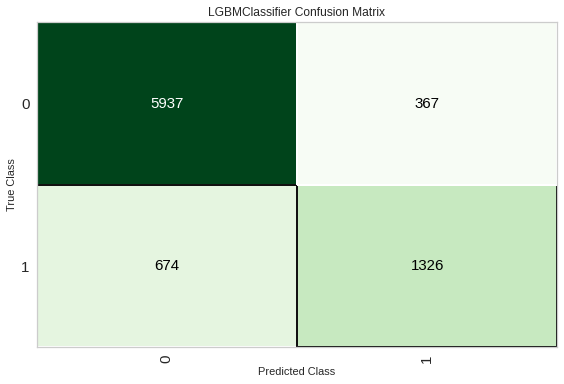

In [110]:
plot_model(tuned_lgbm, plot='confusion_matrix')

## 10.2 - Feature Importance

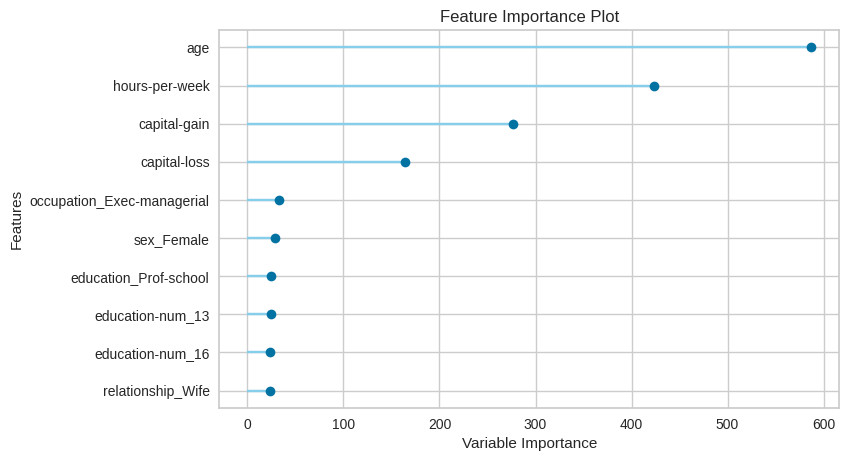

In [111]:
plot_model(tuned_lgbm, plot='feature')

*Another* way to analyze the performance of models is to use the `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function. 

In [112]:
evaluate_model(tuned_lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 11 - Predict on Test / Hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting on the test/hold-out set and reviewing the evaluation metrics. 

If you look at the information in Section 6 above, you will see that 30% (8304 samples) of the data has been separated out as test/hold-out sample. 

All of the evaluation metrics we have seen above are cross validated results based on the training set (70%) only. The `plot_model` shows results on the Test Data.

We can use our trained model stored in the `tuned_lgbm` variable to get predictions from our test data and use them as necessary

In [113]:
results = predict_model(tuned_lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8746,0.9309,0.663,0.7832,0.7181,0.6382,0.6419


The accuracy on test/hold-out set is **`0.8746`** compared to **`0.8701`** achieved on the `tuned_lgbm` CV results earlier. 

This is not a significant difference. If there is a large variation between the test/hold-out and CV results, then this would normally indicate over-fitting but could also be due to several other factors and would require further investigation. 

In this case, we will move forward with finalizing the model and predicting on unseen data (the 15% that we had separated in the beginning and never exposed to PyCaret experiments).

# 12 - Finalize Model for Deployment

Model finalization is the last step in the experiment. 

A normal machine learning workflow in PyCaret starts with `setup()`, followed by comparing all models using `compare_models()` and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. (more on advanced techniques in the next tutorial!).

This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. 


The `finalize_model()` function fits the model onto the complete dataset **including** the test/hold-out sample (30% in this case). The purpose of this function is to **train the model on the complete dataset** before it is deployed in production.

In [114]:
final_lgbm = finalize_model(tuned_lgbm)

In [115]:
#Final Light Gradient Boosting Model to be used for deployment
final_lgbm

LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=100, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.001, reg_lambda=5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

**Caution:** Once the model is finalized using `finalize_model()`, the entire dataset including the test/hold-out set is used for training. 

As such, if the model is used for predictions on the hold-out set after `finalize_model()` is used, the results will be misleading as you are trying to predict on the same data that was used for modeling. 

In order to demonstrate this point only, we will use `final_lgbm` under `predict_model()` to compare the information grid with the one above in section 11. 

In [117]:
predict_model(final_lgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8886,0.9456,0.702,0.8102,0.7522,0.6808,0.6837


You can clearly see even if the model is the same, because it was also trained on the test data one final time, accuracy is now higher at __0.8886__ as compared to our model in Section 11 with __0.8746__ accuracy.

# 13 - Predict on unseen / new datasets

The `predict_model()` function is also used to predict on any new / unseen datasets. 

The only difference from section 11 above is that this time we will pass the `data_test` parameter. `data_test` is the variable created at the beginning of the tutorial and contains 15% of the original dataset which was never exposed to PyCaret. (see section 5 for explanation)

In [118]:
new_predictions = predict_model(final_lgbm, data=data_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8731,0.9302,0.6586,0.7866,0.7169,0.6359,0.6401


In [119]:
new_predictions.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K,Label,Score
0,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1,1,0.9864
1,30,State-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1,0,0.5486
2,32,Private,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,0,0,0.8336
3,25,Self-emp-not-inc,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,0,0,0.9974
4,59,Private,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,0,0,0.9475


The `Label` and `Score` columns are added onto the `data_test` set. 

Label is the prediction and score is the probability of the prediction. 

Notice that predicted results are concatenated to the original dataset while all the data transformations are automatically performed in the background. 


In [120]:
from sklearn.metrics import classification_report

print(classification_report(new_predictions['income >50K'], new_predictions['Label']))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3692
           1       0.79      0.66      0.72      1192

    accuracy                           0.87      4884
   macro avg       0.84      0.80      0.82      4884
weighted avg       0.87      0.87      0.87      4884



# 14 - Saving your ML Model

We have now finished the experiment by finalizing the `tuned_lgbm` model which is now stored in `final_lgbm` variable. 

We have also used the model stored in `final_lgbm` to predict `data_test`. 

This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? 

The answer is no, PyCaret's inbuilt function `save_model()` allows you to save the model along with entire transformation pipeline for later use.

In [121]:
save_model(final_lgbm,'lgbm_model_20220704')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='income >50K', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_s...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.8,
                                 importance_type='split', learning_rate=0.2,
                                 max_depth=-1

# 15 - Load Saved ML Model for future use

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction.

In [122]:
trained_lgbm = load_model('lgbm_model_20220704')

Transformation Pipeline and Model Successfully Loaded


In [123]:
trained_lgbm

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='income >50K', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_s...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.8,
                                importance_type='split', learning_rate=0.2,
                                max_depth=-1, min_child_sampl

In [124]:
new_predictions = predict_model(trained_lgbm, data=data_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8731,0.9302,0.6586,0.7866,0.7169,0.6359,0.6401


In [125]:
new_predictions.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K,Label,Score
0,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1,1,0.9864
1,30,State-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1,0,0.5486
2,32,Private,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,0,0,0.8336
3,25,Self-emp-not-inc,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,0,0,0.9974
4,59,Private,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,0,0,0.9475


In [126]:
print(classification_report(new_predictions['income >50K'], new_predictions['Label']))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3692
           1       0.79      0.66      0.72      1192

    accuracy                           0.87      4884
   macro avg       0.84      0.80      0.82      4884
weighted avg       0.87      0.87      0.87      4884

